In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#from scipy.interpolate import interp1d
from scipy import interpolate
%matplotlib inline


#import data to a pandas dataframe
#data = pd.read_csv(r'/home/angelos/Desktop/nadiasthesis/solar_data.csv')
#data = pd.read_csv(r'solar_data.csv')
data = pd.read_csv(r'C:\Users\nadia\OneDrive\Desktop\thesis\solar_data.csv')

#add colums to our dataframe
data['kt'] = data['GHIobs']/ data['TOA']
data['h']= np.radians(90 - data['sza'])
data['m']= (np.sin(data['h']) + 0.15 * (np.degrees(data['h']) + 3.885)**(-1.253))**(-1)
data['kt_1']= data['kt']/(1.031 * np.exp(-1.4/(0.9+ 9.4/data['m'])) + 0.1)


#divide dataframe according to weather conditions (ανοιχτό διάστημα προς τα αριστερά)
clear = data[data['kt_1'].between(0.65,10,inclusive='right')]
intermediate = data[data['kt_1'].between(0.30,0.65,inclusive='right')]
cloudy = data[data['kt_1'].between(0.00,0.30,inclusive='right')]

#print(clear['kt_1'].head(50))
#print(intermediate.head(15))
data

,timestamp,GHIobs,GHIraw,TOA,sza,kt,h,m,kt_1
0,2019-01-01T06:58:00Z,64.056280,39.696,250.560,79.7477,0.255652,0.178936,5.452219,0.362773
1,2019-01-01T06:59:00Z,64.580127,42.480,254.166,79.5986,0.254086,0.181539,5.379213,0.359094
2,2019-01-01T07:00:00Z,65.055307,45.342,257.760,79.4499,0.252387,0.184134,5.308312,0.355280
3,2019-01-01T07:01:00Z,65.915272,48.276,261.336,79.3017,0.252224,0.186721,5.239476,0.353672
4,2019-01-01T07:02:00Z,66.664090,51.288,264.906,79.1538,0.251652,0.189302,5.172529,0.351524
...,...,...,...,...,...,...,...,...,...
446730,2020-12-31T14:10:00Z,54.462491,15.480,262.002,79.2741,0.207871,0.187202,5.226852,0.291269
446731,2020-12-31T14:11:00Z,52.894380,20.472,258.426,79.4221,0.204679,0.184619,5.295263,0.287910
446732,2020-12-31T14:12:00Z,53.381819,27.396,254.844,79.5706,0.209469,0.182027,5.365719,0.295814
446733,2020-12-31T14:13:00Z,56.225214,34.044,251.244,79.7194,0.223787,0.179430,5.438211,0.317310


In [2]:
# plot function 
def graph(raw,obs,z,cond):
    plt.figure(figsize=(10,10))
    plt.plot(raw,obs,"ro",color=z,markersize=1)
    plt.xlabel("observed GHI (W/m^2)")
    plt.ylabel("mod GHI (W/m^2) ")
    model = LinearRegression().fit(raw.values.reshape(-1,1), obs.values.reshape((-1, 1)))
    print('for', cond ,'weather conditions')
    print('*slope (a) is:', model.coef_)
    print("*intercept(b) is",model.intercept_)
    return (model.coef_,model.intercept_)


In [3]:
# MBE function
def MBE(name,raw,obs,c):
    data[name]= raw-obs
    sum_ = data[name].sum()
    n = len(data[name].index)
    MBE_= sum_ / n
    print("the MBE index for the",c, "conditions is:",MBE_)
    return MBE_


In [4]:
# RMSE function
def RMSE(name,raw,obs,c):
    data[name] = (raw-obs)**2
    sum_=data[name].sum()
    n = len(data[name].index)
    RMSE_=(sum_/n)**0.5
    print("the RMSE index for the",c, "conditions is:", RMSE_)
    return RMSE_

In [5]:
# R function
def R(raw, obs, c):
    n=len(raw.index)
    xmean = raw.sum()/n
    ymean = obs.sum()/n
    arithm= ((raw-xmean)*(obs-ymean)).sum()
    paranom= (((raw-xmean)**2).sum() * ((obs-ymean)**2).sum())**0.5
    R_ = arithm / paranom
    print("the R index for the",c, "conditions is:", R_)
    return R_

# Data Visualization and Errors

for clear weather conditions
*slope (a) is: [[0.98148241]]
*intercept(b) is [2.86769278]
the MBE index for the clear conditions is: -5.691368313023689
the RMSE index for the clear conditions is: 48.89818975231034
the R index for the clear conditions is: 0.9729398936115145


0.9729398936115145

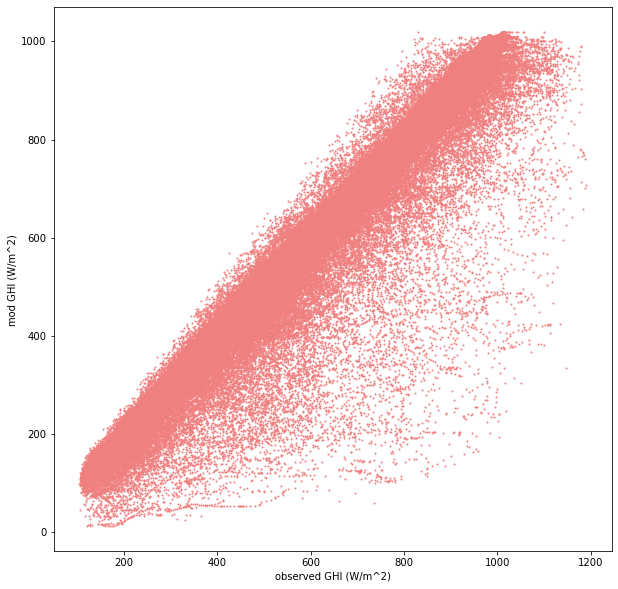

In [6]:
#clear weather conditions 
x1='clr'
x11='clr2'
y1=clear['GHIraw']
z1=clear['GHIobs']

c1='clear'
r1='lightcoral'

p1,p11 = graph(z1,y1,r1,c1)
MBE(x1,y1,z1,c1)
RMSE(x11,y1,z1,c1)
R(y1,z1,c1)

for intermediate weather conditions
*slope (a) is: [[1.14972483]]
*intercept(b) is [28.24778304]
the MBE index for the intermediate conditions is: 10.419590634533211
the RMSE index for the intermediate conditions is: 56.62689786017935
the R index for the intermediate conditions is: 0.8142533897166538


0.8142533897166538

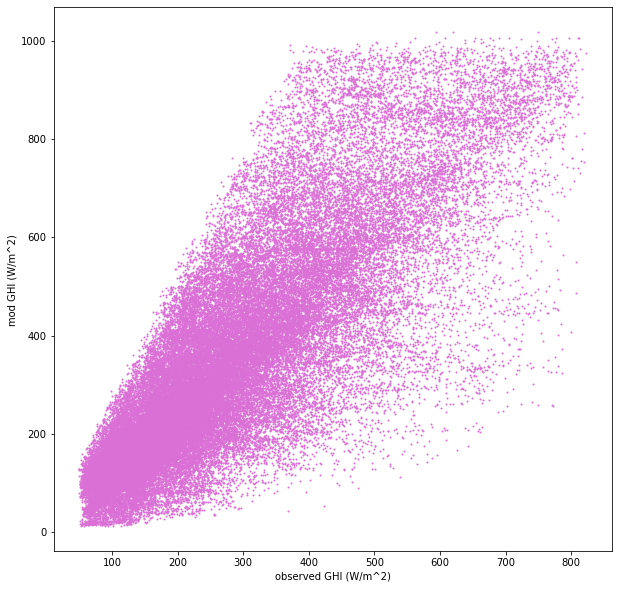

In [7]:
#intermediate weather conditions 
x2='int'
x22='int2'
y2=intermediate['GHIraw']
z2=intermediate['GHIobs']

c2='intermediate'
r2='orchid'

p2,p22 = graph(z2,y2,r2,c2)
MBE(x2,y2,z2,c2)
RMSE(x22,y2,z2,c2)
R(y2,z2,c2)

for cloudy weather conditions
*slope (a) is: [[1.58052854]]
*intercept(b) is [33.75665189]
the MBE index for the cloudy conditions is: 10.666448554292954
the RMSE index for the cloudy conditions is: 55.20423858551945
the R index for the cloudy conditions is: 0.6800137826364004


0.6800137826364004

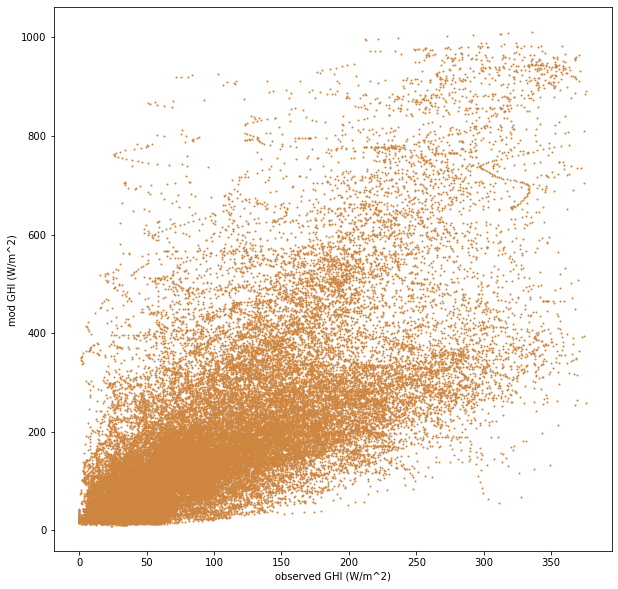

In [8]:
#cloudy weather conditions 
x3='cld'
x33='cld2'
y3=cloudy['GHIraw']
z3=cloudy['GHIobs']

c3='cloudy'
r3='peru'

p3,p33 = graph(z3,y3,r3,c3)
MBE(x3,y3,z3,c3)
RMSE(x33,y3,z3,c3)
R(y3,z3,c3)

In [9]:
data.head(100)

,timestamp,GHIobs,GHIraw,TOA,sza,kt,h,m,kt_1,clr,clr2,int,int2,cld,cld2
0,2019-01-01T06:58:00Z,64.056280,39.696,250.560,79.7477,0.255652,0.178936,5.452219,0.362773,NaN,NaN,-24.360280,593.423262,NaN,NaN
1,2019-01-01T06:59:00Z,64.580127,42.480,254.166,79.5986,0.254086,0.181539,5.379213,0.359094,NaN,NaN,-22.100127,488.415634,NaN,NaN
2,2019-01-01T07:00:00Z,65.055307,45.342,257.760,79.4499,0.252387,0.184134,5.308312,0.355280,NaN,NaN,-19.713307,388.614476,NaN,NaN
3,2019-01-01T07:01:00Z,65.915272,48.276,261.336,79.3017,0.252224,0.186721,5.239476,0.353672,NaN,NaN,-17.639272,311.143927,NaN,NaN
4,2019-01-01T07:02:00Z,66.664090,51.288,264.906,79.1538,0.251652,0.189302,5.172529,0.351524,NaN,NaN,-15.376090,236.424155,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01T08:33:00Z,423.028853,176.268,533.622,67.7255,0.792750,0.388763,2.620854,0.927580,-246.760853,60890.918494,NaN,NaN,NaN,NaN
96,2019-01-01T08:34:00Z,421.308922,185.010,535.878,67.6262,0.786203,0.390496,2.609968,0.919077,-236.298922,55837.180710,NaN,NaN,NaN,NaN
97,2019-01-01T08:35:00Z,420.132445,193.818,538.116,67.5276,0.780747,0.392217,2.599256,0.911876,-226.314445,51218.227997,NaN,NaN,NaN,NaN
98,2019-01-01T08:36:00Z,419.727926,202.698,540.336,67.4296,0.776791,0.393928,2.588702,0.906447,-217.029926,47101.988710,NaN,NaN,NaN,NaN


In [10]:
#is the kt_1 index okay for the cloudy conditions?
print(cloudy[['timestamp','GHIobs','GHIraw','kt','kt_1']].head(20))

                timestamp     GHIobs   GHIraw        kt      kt_1
14   2019-01-01T07:12:00Z  66.571981   90.000  0.221942  0.299512
438  2019-01-02T06:58:00Z  39.191831  152.730  0.156503  0.222116
877  2019-01-03T06:58:00Z   1.241005   22.482  0.004956  0.007033
878  2019-01-03T06:59:00Z   1.278386   22.242  0.005032  0.007113
889  2019-01-03T07:10:00Z   2.055013   17.874  0.007011  0.009522
891  2019-01-03T07:12:00Z   3.136635   19.344  0.010454  0.014107
892  2019-01-03T07:13:00Z   4.004433   20.190  0.013194  0.017749
893  2019-01-03T07:14:00Z   4.964095   21.054  0.016173  0.021689
894  2019-01-03T07:15:00Z   5.608336   21.936  0.018070  0.024160
895  2019-01-03T07:16:00Z   5.865494   22.830  0.018693  0.024918
896  2019-01-03T07:17:00Z   5.750725   23.742  0.018130  0.024098
897  2019-01-03T07:18:00Z   5.305305   24.672  0.016549  0.021933
898  2019-01-03T07:19:00Z   5.343344   25.614  0.016493  0.021799
899  2019-01-03T07:20:00Z   5.981622   26.574  0.018274  0.024085
900  2019-

# Correction of mod values

In [11]:
#by now we have divided our dataframe to 3 different ones according to the weather conditions
clear

,timestamp,GHIobs,GHIraw,TOA,sza,kt,h,m,kt_1
75,2019-01-01T08:13:00Z,280.098494,101.304,485.058,69.8456,0.577454,0.351761,2.879004,0.690174
76,2019-01-01T08:14:00Z,303.008111,102.042,487.638,69.7337,0.621379,0.353714,2.864025,0.741777
77,2019-01-01T08:15:00Z,322.162920,102.780,490.200,69.6224,0.657207,0.355656,2.849290,0.783612
78,2019-01-01T08:16:00Z,331.547972,103.518,492.750,69.5117,0.672852,0.357588,2.834793,0.801324
79,2019-01-01T08:17:00Z,338.123407,104.250,495.282,69.4016,0.682689,0.359510,2.820529,0.812097
...,...,...,...,...,...,...,...,...,...
446662,2020-12-31T13:02:00Z,372.732793,239.304,474.810,70.2890,0.785015,0.344022,2.940026,0.942854
446679,2020-12-31T13:19:00Z,291.647972,221.760,427.662,72.3149,0.681959,0.308663,3.257514,0.839566
446680,2020-12-31T13:20:00Z,261.273001,221.688,424.758,72.4391,0.615110,0.306496,3.279336,0.758520
446690,2020-12-31T13:30:00Z,288.905678,207.744,394.884,73.7099,0.731622,0.284316,3.521406,0.918552


## First method: Linear correction


In [12]:
# GHImod = aGHIobs + β : already calculated above (GHImod=GHIraw)
# GHImod,cor = GHImod - [(a-1)GHIobs +b]

GHIcclr = clear['GHIraw'] - ((p1[0][0] - 1)*clear['GHIobs'] +  p11)
GHIcint = intermediate['GHIraw'] - ((p2[0][0] - 1)*intermediate['GHIobs'] +  p22)
GHIccld = cloudy['GHIraw'] - ((p3[0][0] - 1)*cloudy['GHIobs'] +  p33)

In [13]:
# GHImod,cor = a'GHImod + b' : προσδιορισμός των α', β'

for clear weather conditions
*slope (a) is: [[1.]]
*intercept(b) is [-4.32009983e-12]
the MBE index for the clear conditions is: 1.3864279537250589e-13
the RMSE index for the clear conditions is: 48.27515972538156
the R index for the clear conditions is: 0.9738942545309546


0.9738942545309546

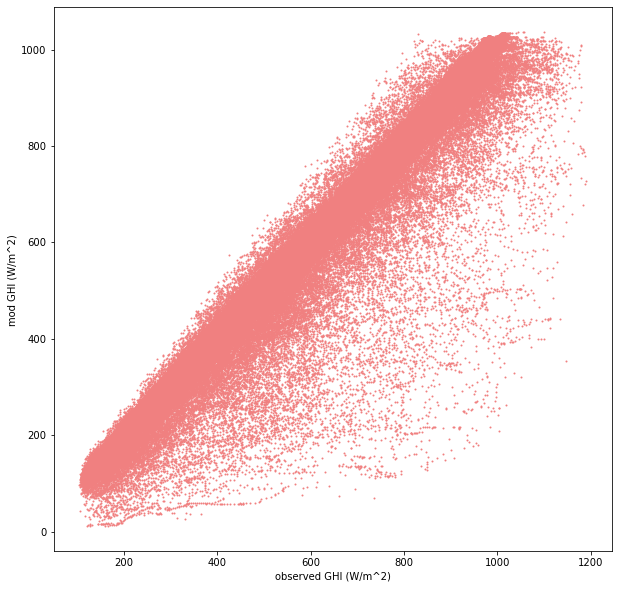

In [14]:
#corrected clear conditions
cx1 = 'cclr'
cx11 = 'cclr2'
cy1 = GHIcclr
cz1 = clear['GHIobs']

#c1, r1 same as before

graph(cz1,cy1,r1,c1)
MBE(cx1, cy1, cz1, c1)
RMSE(cx11,cy1,cz1,c1)
R(cy1,cz1,c1)

for intermediate weather conditions
*slope (a) is: [[1.]]
*intercept(b) is [-5.68434189e-14]
the MBE index for the intermediate conditions is: -1.1742902257101525e-14
the RMSE index for the intermediate conditions is: 48.9246364835566
the R index for the intermediate conditions is: 0.7733895376694554


0.7733895376694554

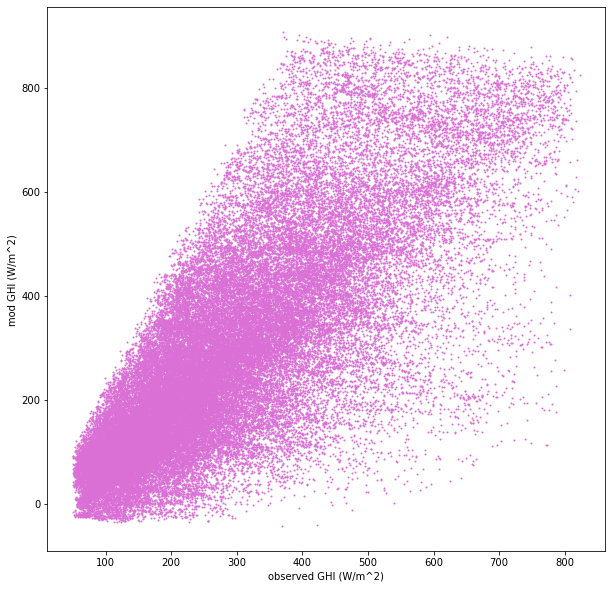

In [15]:
#corrected intermediate conditions
cx2 = 'cint'
cx22 = 'cint2'
cy2 = GHIcint
cz2 = intermediate['GHIobs']

graph(cz2,cy2,r2,c2)
MBE(cx2, cy2, cz2, c2)
RMSE(cx22,cy2,cz2,c2)
R(cy2,cz2,c2)

for cloudy weather conditions
*slope (a) is: [[1.]]
*intercept(b) is [9.9475983e-14]
the MBE index for the cloudy conditions is: -2.9642277542198024e-15
the RMSE index for the cloudy conditions is: 42.239468929617026
the R index for the cloudy conditions is: 0.5061029424612975


0.5061029424612975

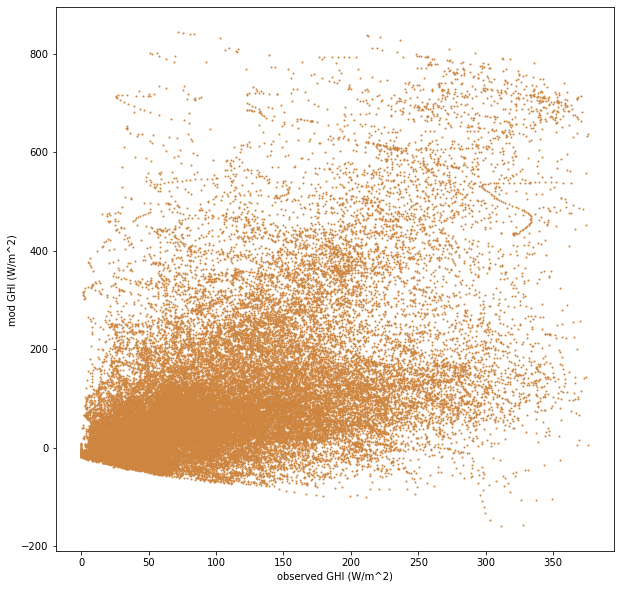

In [16]:
#corrected clody conditions
cx3 = 'ccld'
cx33 = 'ccld2'
cy3 = GHIccld
cz3 = cloudy['GHIobs']


graph(cz3,cy3,r3,c3)
MBE(cx3, cy3, cz3, c3)
RMSE(cx33,cy3,cz3,c3)
R(cy3,cz3,c3)

In [17]:
data.head(100)

,timestamp,GHIobs,GHIraw,TOA,sza,kt,h,m,kt_1,clr,...,int,int2,cld,cld2,cclr,cclr2,cint,cint2,ccld,ccld2
0,2019-01-01T06:58:00Z,64.056280,39.696,250.560,79.7477,0.255652,0.178936,5.452219,0.362773,NaN,...,-24.360280,593.423262,NaN,NaN,NaN,NaN,-62.198879,3868.700592,NaN,NaN
1,2019-01-01T06:59:00Z,64.580127,42.480,254.166,79.5986,0.254086,0.181539,5.379213,0.359094,NaN,...,-22.100127,488.415634,NaN,NaN,NaN,NaN,-60.017159,3602.059411,NaN,NaN
2,2019-01-01T07:00:00Z,65.055307,45.342,257.760,79.4499,0.252387,0.184134,5.308312,0.355280,NaN,...,-19.713307,388.614476,NaN,NaN,NaN,NaN,-57.701485,3329.461382,NaN,NaN
3,2019-01-01T07:01:00Z,65.915272,48.276,261.336,79.3017,0.252224,0.186721,5.239476,0.353672,NaN,...,-17.639272,311.143927,NaN,NaN,NaN,NaN,-55.756208,3108.754785,NaN,NaN
4,2019-01-01T07:02:00Z,66.664090,51.288,264.906,79.1538,0.251652,0.189302,5.172529,0.351524,NaN,...,-15.376090,236.424155,NaN,NaN,NaN,NaN,-53.605143,2873.511380,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01T08:33:00Z,423.028853,176.268,533.622,67.7255,0.792750,0.388763,2.620854,0.927580,-246.760853,...,NaN,NaN,NaN,NaN,-241.795072,58464.856641,NaN,NaN,NaN,NaN
96,2019-01-01T08:34:00Z,421.308922,185.010,535.878,67.6262,0.786203,0.390496,2.609968,0.919077,-236.298922,...,NaN,NaN,NaN,NaN,-231.364990,53529.758630,NaN,NaN,NaN,NaN
97,2019-01-01T08:35:00Z,420.132445,193.818,538.116,67.5276,0.780747,0.392217,2.599256,0.911876,-226.314445,...,NaN,NaN,NaN,NaN,-221.402298,49018.977644,NaN,NaN,NaN,NaN
98,2019-01-01T08:36:00Z,419.727926,202.698,540.336,67.4296,0.776791,0.393928,2.588702,0.906447,-217.029926,...,NaN,NaN,NaN,NaN,-212.125270,44997.130083,NaN,NaN,NaN,NaN


   ## Second method: EQM (empirical quantile mapping)

In [18]:
num = list(np.arange(0,100,0.5))

In [19]:
#calculating the percentiles for the module and the observed values for all weather conditions

clobper=np.percentile(clear['GHIobs'],num)
clrawper=np.percentile(clear['GHIraw'],num)

inobper=np.percentile(intermediate['GHIobs'],num)
inrawper=np.percentile(intermediate['GHIraw'],num)

cdobper=np.percentile(cloudy['GHIobs'],num)
cdrawper=np.percentile(cloudy['GHIraw'],num)

## initial visualization of the data

In [20]:
#plot2 function for the percentiles of mod and obs values
def graph2(obper,rawper):
    plt.figure(figsize=(10,10))
    plt.ylabel("percentile")
    plt.xlabel("GHI (W/m^2)")
    plt.plot(obper, num, color='red', label = "obs")
    plt.plot(rawper, num,color='pink',label = "mod")
    plt.legend()
    plt.show()

for the clear weather conditions


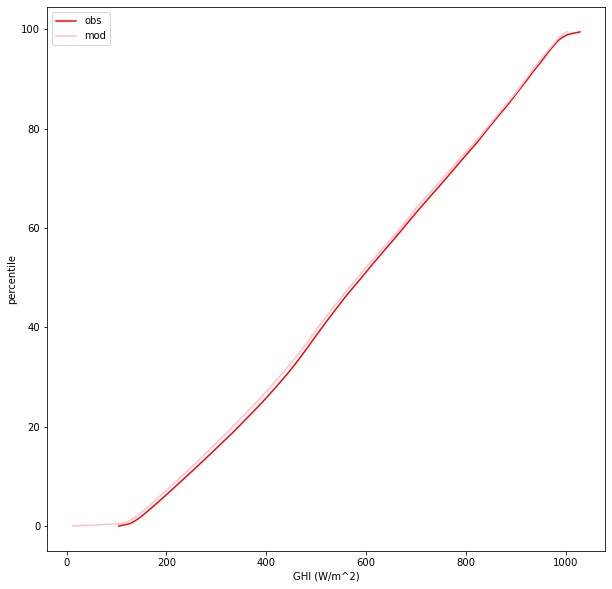

In [21]:
print("for the clear weather conditions")
graph2(clobper,clrawper)

for the intermediate weather conditions


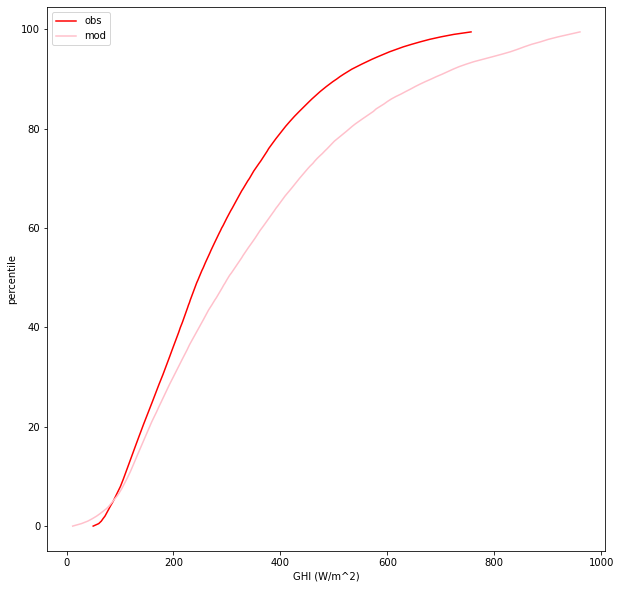

In [22]:
print("for the intermediate weather conditions")
graph2(inobper,inrawper)

for the cloudy weather conditions


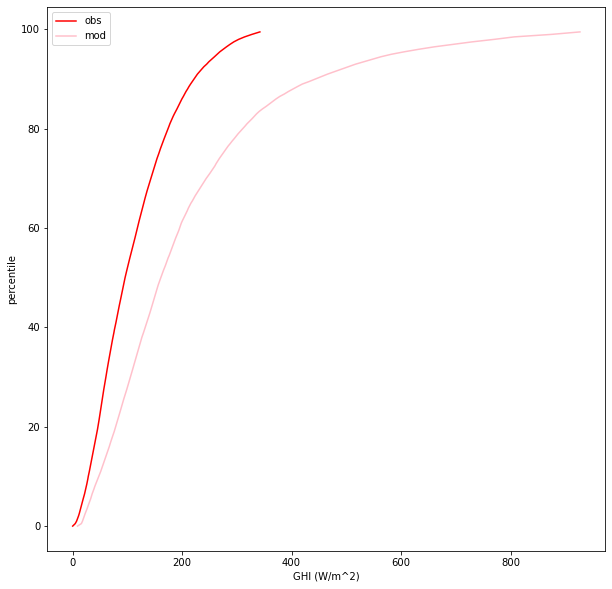

In [23]:
print("for the cloudy weather conditions")
graph2(cdobper,cdrawper)

In [35]:
#plot3 function for comparing mod and obs values
def graph3(perobs,permod,col):
    plt.figure(figsize=(10,10))
    plt.ylabel("obs quantile ")
    plt.xlabel("mod quantile ")
    plt.plot(perobs, permod, color=col)
    plt.show()

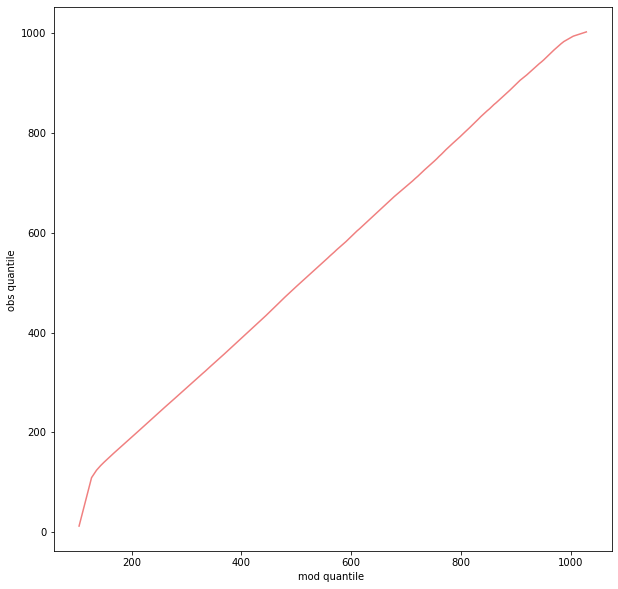

In [25]:
graph3(clobper,clrawper,'lightcoral')

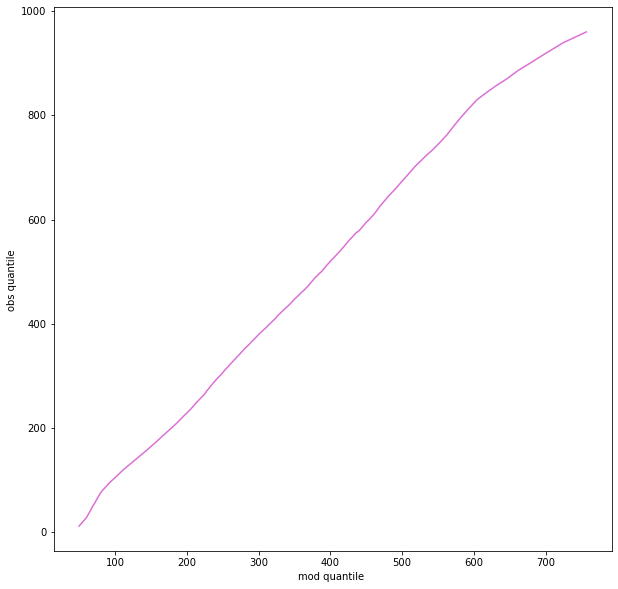

In [26]:
graph3(inobper,inrawper,'orchid')

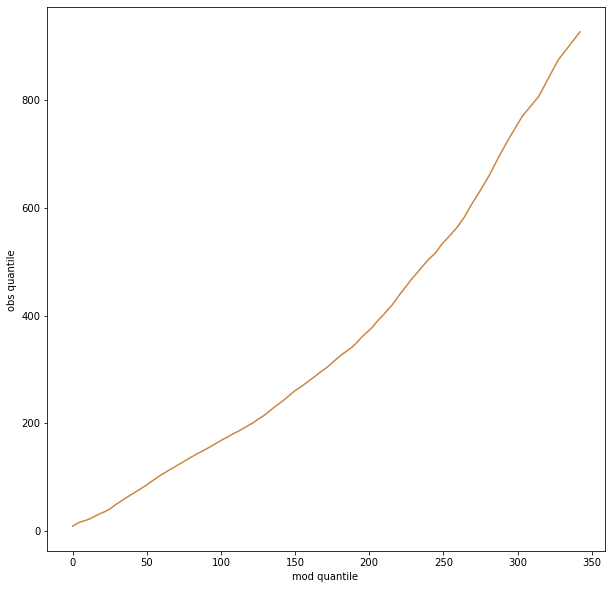

In [27]:
graph3(cdobper,cdrawper,'peru')

In [28]:
# γραμμική παρεμβολή

In [88]:
# linear interpolation function
def nef(x,y):
    #x = cdrawper, y = cdobper
    f = interpolate.interp1d(x, y)
    xnew = x
    ynew = f(xnew) 
    plt.figure(figsize=(10,10)) 
    plt.plot(x, y, 'o', xnew, ynew, '.')
    plt.show()
    return ynew

In [89]:
# MBE2 function
def MBE2(raw,obs,c):
    x= raw-obs
    sum_ = x.sum()
    n = len(x)
    MBE2_= sum_ / n
    print("the MBE index for the",c, "conditions is:",MBE2_)
    return MBE2_

# RMSE2 function
def RMSE2(raw,obs,c):
    x = (raw-obs)**2
    sum_=x.sum()
    n = len(x)
    RMSE2_=(sum_/n)**0.5
    print("the RMSE index for the",c, "conditions is:", RMSE2_)
    return RMSE2_

# R2 function
def R2(raw, obs, c):
    n=len(raw)
    xmean = raw.sum()/n
    ymean = obs.sum()/n
    arithm= ((raw-xmean)*(obs-ymean)).sum()
    paranom= (((raw-xmean)**2).sum() * ((obs-ymean)**2).sum())**0.5
    R_ = arithm / paranom
    print("the R index for the",c, "conditions is:", R_)
    return R_

the MBE index for the clear conditions is: 8.136031408748497
the RMSE index for the clear conditions is: 10.567832487833924
the R index for the clear conditions is: 0.9997150455473495


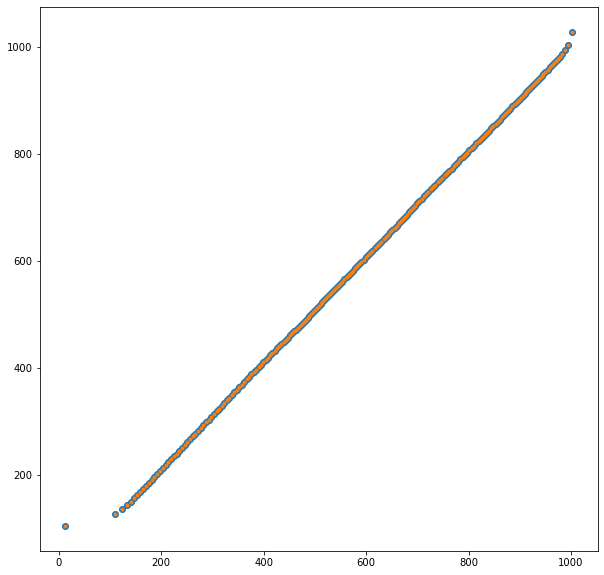

In [90]:
#clear weather

MBE2(n1,clrawper,'clear')
RMSE2(n1,clrawper,'clear')
R2(n1,clrawper,'clear')

n1 = nef(clrawper,clobper)

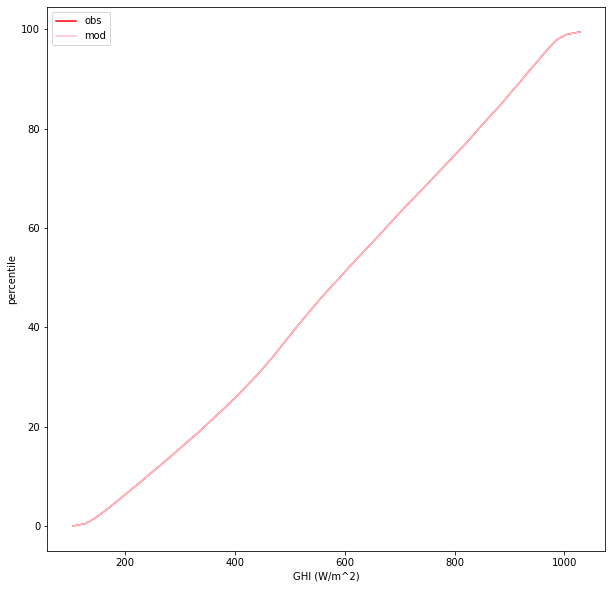

In [101]:
graph2(clobper,n1)

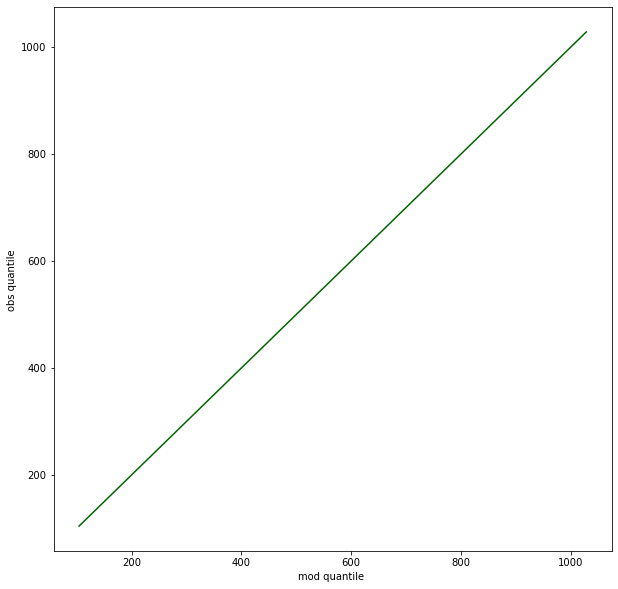

In [92]:
graph3(n1,clobper,'darkgreen')

the MBE index for the intermediate conditions is: -69.80819943870223
the RMSE index for the intermediate conditions is: 95.00038446006158
the R index for the intermediate conditions is: 0.999210019073893


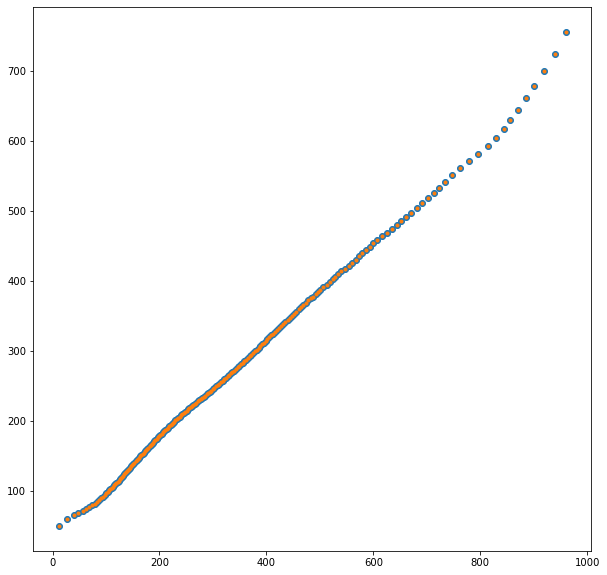

In [93]:
#intermediate weather conditions

MBE2(n2,inrawper,'intermediate')
RMSE2(n2,inrawper,'intermediate')
R2(n2,inrawper,'intermediate')

n2 = nef(inrawper,inobper)

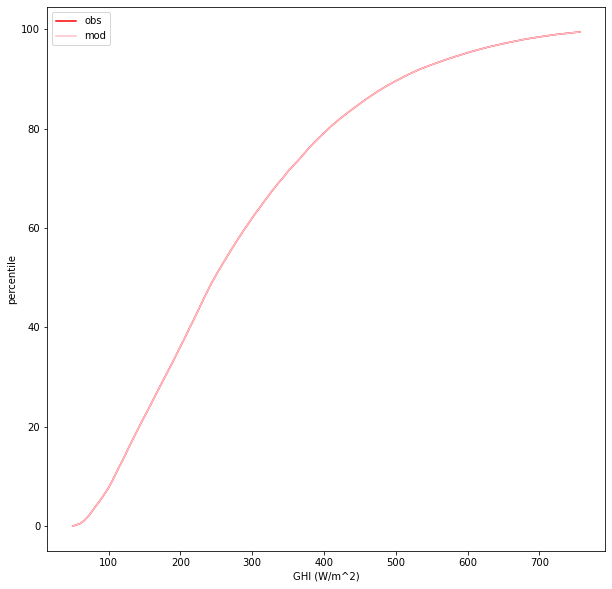

In [102]:
graph2(inobper,n2)

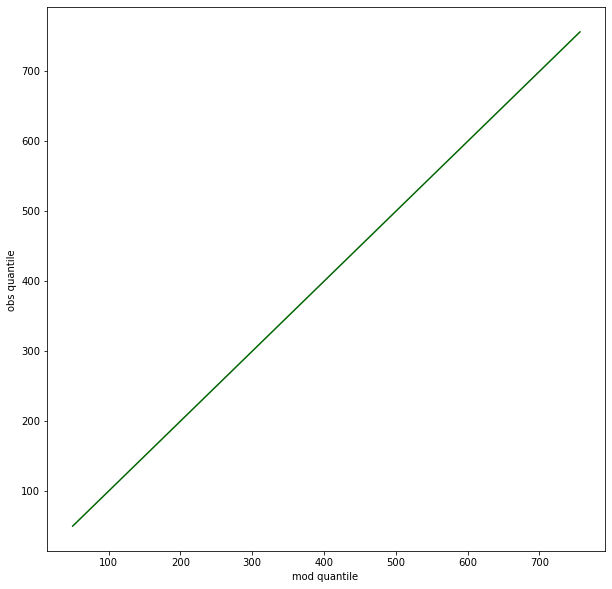

In [95]:
graph3(n2,inobper,"darkgreen")

the MBE index for the cloudy conditions is: -97.4909090634415
the RMSE index for the cloudy conditions is: 139.54808943520828
the R index for the cloudy conditions is: 0.9772792771246649


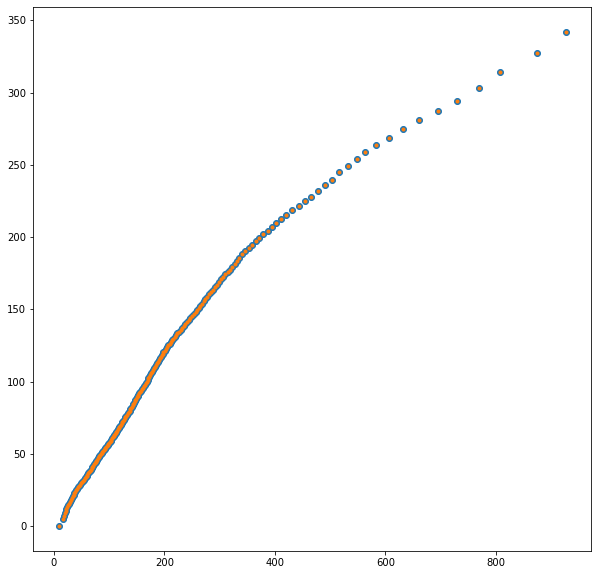

In [110]:
#cloudy weather conditions

MBE2(n3,cdrawper,'cloudy')
RMSE2(n3,cdrawper,'cloudy')
R2(n3,cdrawper,'cloudy')

n3 = nef(cdrawper,cdobper)

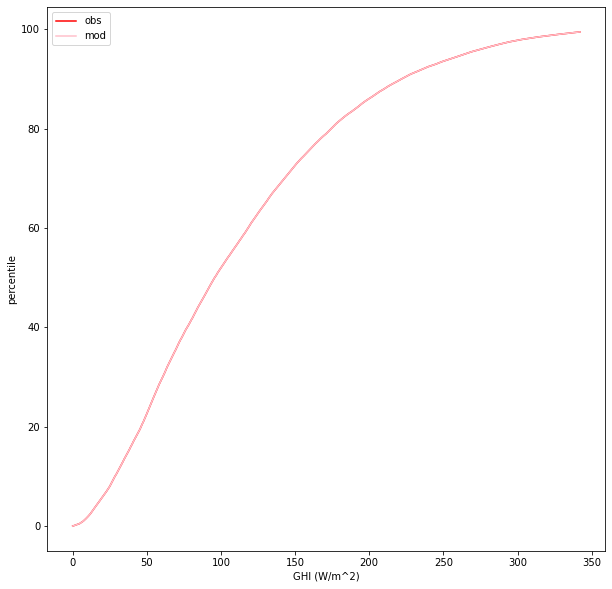

In [103]:
graph2(cdobper,n3)

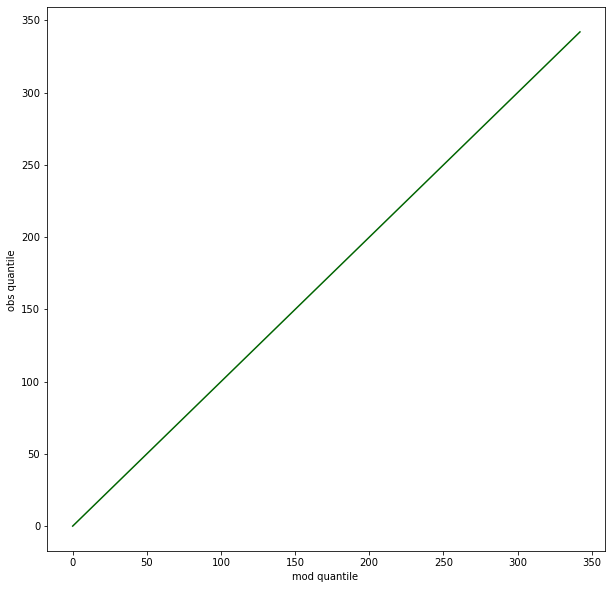

In [98]:
graph3(n3,cdobper,"darkgreen")